# 2017 FordGo Bikeshare Data for the San Francisco Bay Area

## About the Data
FordGo is a partnership between Ford Motor Vehicles and Motivate. Motivate operates the bikeshare system while Ford uses their clout to market the use of these bikes. The stations are scattered throughout the San Francisco Bay Area, with a focus on the cities of San Francisco, Oakland, and San Jose. The data tracks users as they rent out a bike from a station until they return it to either the same station or another station. The data was collected from 6/28/2017 to 1/1/2018

The report will focus on the following three research questions:
-  Who uses this system the most?
-  What stations are the most popular?
-  What time of day are the bikes used the most?

Answering these questions will give FordGo Bike an understanding of who is riding their bikes and if their should be any target marketing towards certain age groups, what stations might need increased parking infrastructure, and when maintainence should be done on their bikes. 

Let's load the data. The data can be found [here](https://www.fordgobike.com/system-data).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

#This is an upload of the full file
df = pd.read_csv('C:\\Users\\david\\Downloads\\2017-fordgobike-tripdata.csv') 
df_day_data = pd.read_csv('C:\\Users\\david\\Downloads\\2017-fordgobike-tripdata (2).csv') 

## Understanding the Data

- Trip Duration (seconds) 

- Start Time and Date

- End Time and Date

- Start Station ID

- Start Station Name

- Start Station Latitude

- Start Station Longitude

- End Station ID

- End Station Name

- End Station Latitude

- End Station Longitude

- Bike ID

- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

- Member Year of Birth

- Member Gender

Each station was given a corresponding station ID. "Start Station" indicates where the bike was picked up and "End Station" signifies where the bike was turned in. The stations also include latitude and longitude data for easier mapping. In total, there are 340 stations throughout the system. "Bike ID" is the unique identification number given to each bike, there are 3733 bikes in the system. There are two user types, subscriber and customer. Subscribers are those who pay a monthly fee to use the system and customer are those who use it without the subscription. "Member Year of Birth" and "Member Gender" produced a bit of a challenge because not all users of the system chose to include their birth year or gender. 

## The Analysis
### Demographics of FordGo Users
To make the data a little bit easier to read I converted the birth years to the age of the user. After that I changed the extreme outliers to the mean age. I assumed that no one over 90 years old was renting out a bike. Changing those data point to the mean only made a less than 1% change to the mean. 

In [2]:

#convert to age
df['age'] = (2018 - (df_day_data['member_birth_year']))

#switch any outliers (age above 90) to the mean
mean = df.loc[df['age']<90, 'age'].mean()
df.loc[df.age > 90, 'age'] = np.nan
df.fillna(mean,inplace=True)


To get things started we looked at the age of all the riders. The data showed riders with are 37.5 years old with a standard deviation of 9.5 years. The median rider is born in 37. The total number of FordGo bike users who entered a gender was 453,159. The oldest person was born in 1886. This is extremely questionable as it would make the rider 131 years old in 2017! Thus, the need to change these large outliers to the mean. Perhaps, a user didn't want to enter their correct birth year. FordGo Bike users must be 18 years old therefore, the youngest age is 1999. 

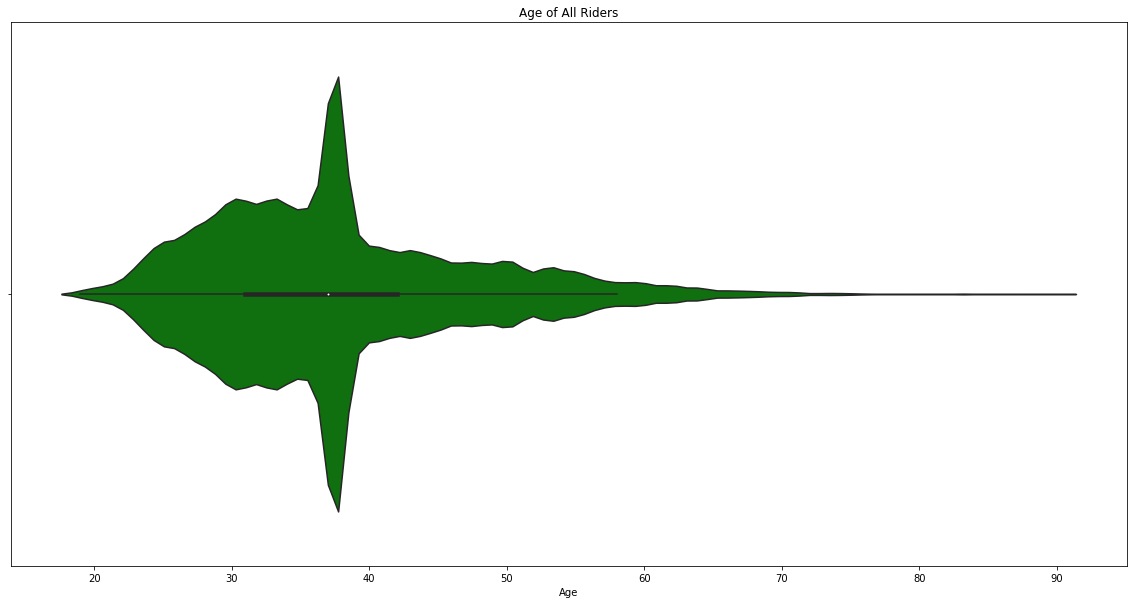

count    519700.000000
mean         37.519660
std           9.558878
min          19.000000
25%          31.000000
50%          37.000000
75%          42.000000
max          90.000000
Name: age, dtype: float64


In [3]:

plt.figure(figsize=(20, 10))
#df['age'] = (2018 - (df_day_data['member_birth_year']))
sns.violinplot(x=df['age'], color='green', alpha=.2)
plt.title('Age of All Riders')
plt.xlabel('Age')

#population mean and standard deviaton
plt.show()

print (df["age"].describe())

#### FordGo Users by Gender
#### Males
The mean of male users is 37.9 years old, slightly above the 37.5 years old average of the total users. The Standard deviation was also about 10.34, almost a full deviation higher than the population. The median was about a year younger than the population at 36 years old. In total the users who identified as male was 348,318 or about a whopping 76.8% of users.  

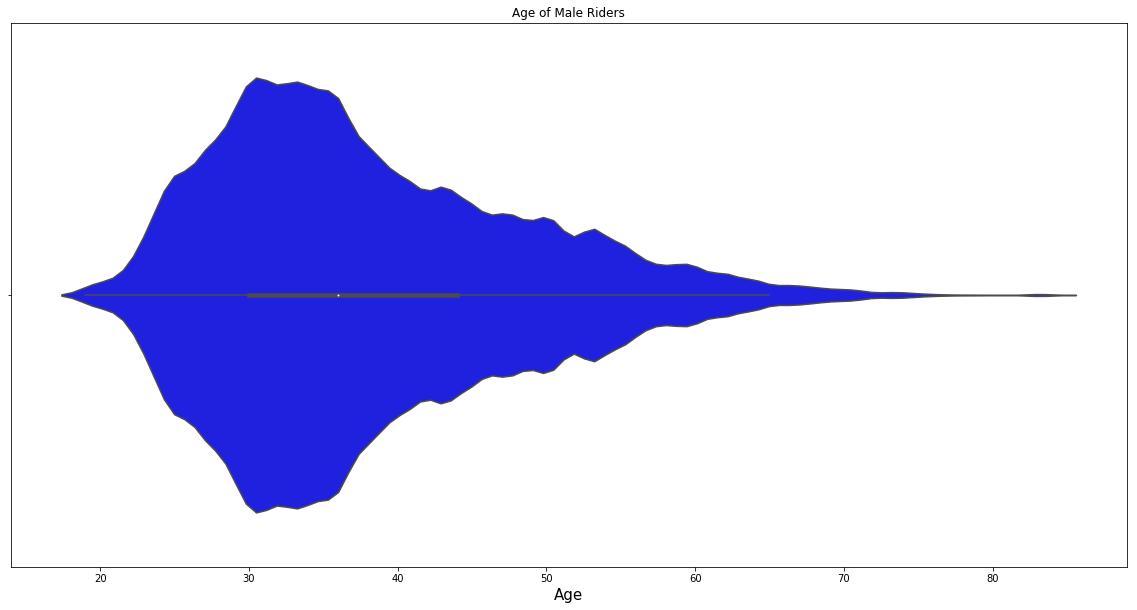

count    348318.000000
mean         37.923435
std          10.343587
min          19.000000
25%          30.000000
50%          36.000000
75%          44.000000
max          84.000000
Name: age, dtype: float64


In [4]:

df_male=df[df_day_data['member_gender'] == ('Male' or 'male') ]

plt.figure(figsize=(20, 10))
sns.violinplot(x=df_male["age"], color='blue', alpha=.2)
plt.title('Age of Male Riders')
plt.xlabel('Age', fontsize=15)
plt.show()

#mean and standard deviation of male riders
print (df_male["age"].describe())
#print (df_male.mean())

#### Females
Those who identified as females were almost a full 2 years younger than male riders. They had an average age of 36.09, a median age of 34, and a lower standard deviation of 9.7, closer to the standard deviation of the overall population. As mentioned above those who identified as male represented 76.8% of the population renters, meaning those who entered a gender were only 23.2% female.    

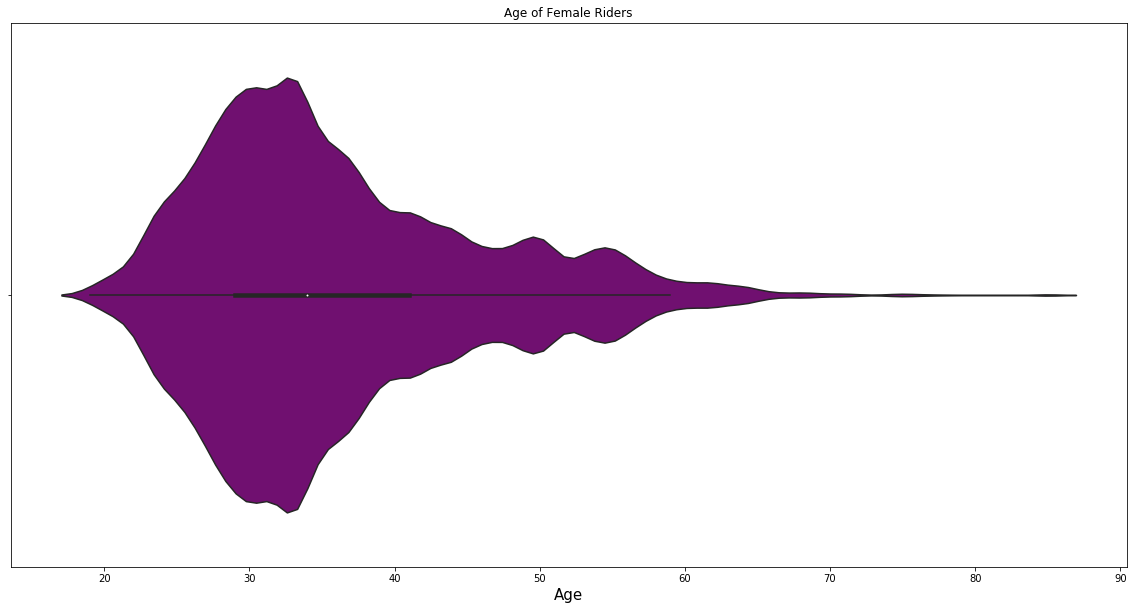

count    98621.000000
mean        36.095224
std          9.703099
min         19.000000
25%         29.000000
50%         34.000000
75%         41.000000
max         85.000000
Name: age, dtype: float64


In [5]:
df_female=df[df['member_gender'] == ('Female' or 'female') ]

plt.figure(figsize=(20, 10))
sns.violinplot(df_female["age"], color='purple', alpha=.2)
#np.mean(df_female["age"])
plt.title('Age of Female Riders')
plt.xlabel('Age', fontsize= 15)
plt.show()

#mean and standard deviation of female riders
print (df_female["age"].describe())
#print (df_female.mean())

#### Analysis of Gender Data
The ratio of female to male users is rather questionable because according to the latest Bay Area census information males represented 49.6% of the population and females represented 50.4% of the population. The FordGo bikeshare data showed only 23.2% of riders being female. Maybe females were less inclined to input their gender data and left that information blank when they signed up. Perhaps the app the sign up fields are set up in a way that male is the default and those listed as male riders are in fact female riders. 

The median age of the bikeshare data is a year younger than the reported median age of the Bay Area. The median age of the Bay Area is 38 and the data has the median age at about 37 years old. This suggests that the average FordGo bike user is slightly younger than the region's median resident age.

#### Travel Habits by age
Next, we used a scatter plot to look at the duration of bike rental by age. The scatter plot represernts the length of an indivdual trip in seconds by a user. The y axis is the trip in seconds and the x axis shows the age of the user taking the trip. This data was meant to pinpoint which age demographic takes longer trips. The graph's data becomes a little skewd after the conversion of the outliers to the mean but, looking at the graph shows riders in their mid 20s to 30s take the longest trips. The trip duration begins to taper off in the mid 40s. 

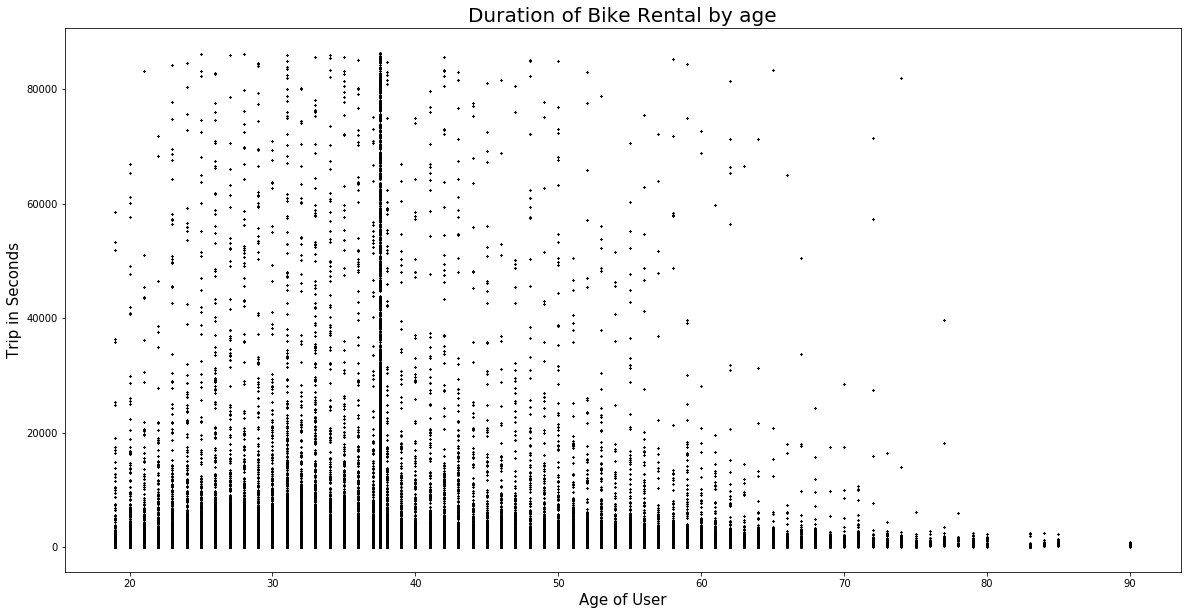

In [6]:
#This plot shows the length of a trip by user birth year
#The scatter plot shows that younger riders go for longer trips
#There are some large outliers of trips probably because of users
#forgetting to return their bikes to the station

plt.figure(figsize=(20, 10))

plt.scatter(x=df['age'],
            y=df['duration_sec'],
           marker= 'x', s=2, color= 'black'
)
plt.title('Duration of Bike Rental by age', fontsize=20)
plt.ylabel('Trip in Seconds', fontsize=15)
plt.xlabel('Age of User', fontsize=15)

plt.show()

Next, we will dive into where these longer trips originate.

### Where do FordGo Bike Users Go?
We examined which stations were the most popular.

-  15  -San Francisco Ferry Building (Harry Bridges Plaza)
-  6 - The Embarcadero at Sansome St
-  30 - San Francisco Caltrain (Townsend St at 4th St)
- 67 - San Francisco Caltrain Station 2  (Townsend St at 4th St)
- 58 - Market St at 10th St

Stations 15 (SF Ferry Building)  and 6 (The Embarcadero at Sansome St.) are located adjacent to ferry terminals. Ferry commuters from the East and North Bay may step off their ferries and on to a FordGo Bike to get to work. Additionally, these stations are along the SF piers, a popular destination spot for tourists.

Stations 30 and 67 are right next to Caltrain. Caltrain is a popular commuter rail that runs along the peninsula from as far south as San Jose and through the tech hubs of Mountain View and Palo Alto. These stations seem like the perfect location for commuters.

This small sample of 5 cities suggests that the primary users of FordGo bikes are commuters. 

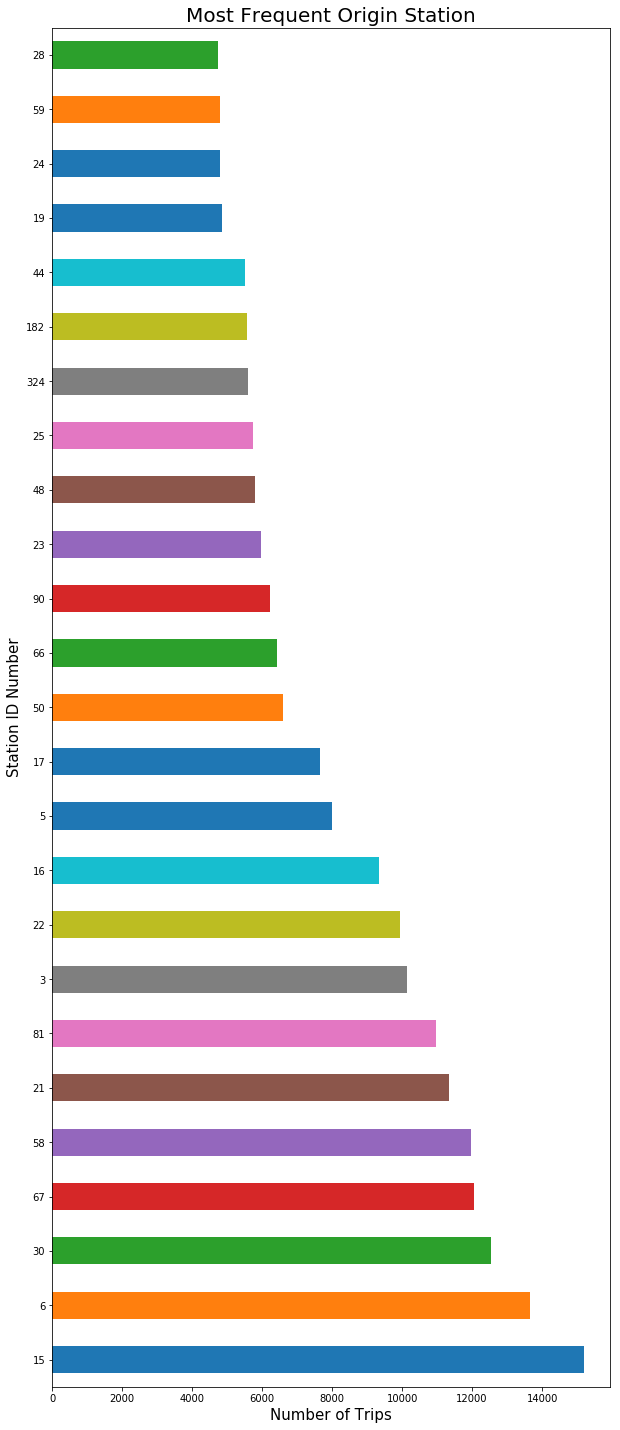

In [7]:

plt.figure(figsize=(10, 25))

Most_freq_station=df['start_station_id'].value_counts().nlargest(25)
#.head(25).sort_values()
plt.xlabel('Number of Trips', fontsize=15)
plt.ylabel('Station ID Number', fontsize=15)
plt.title("Most Frequent Origin Station", fontsize=20)
Most_freq_station.plot.barh()


Next, we examined the distance travelled from each station. By plotting each individual trip from a station with the distance traveled. there are some out liers of trips of over 35 miles. Either someone went on a long ride or checked out a bike in one location and took another mode of transportation to their destination station. The average distance traveled from all stations was 0.98 miles.

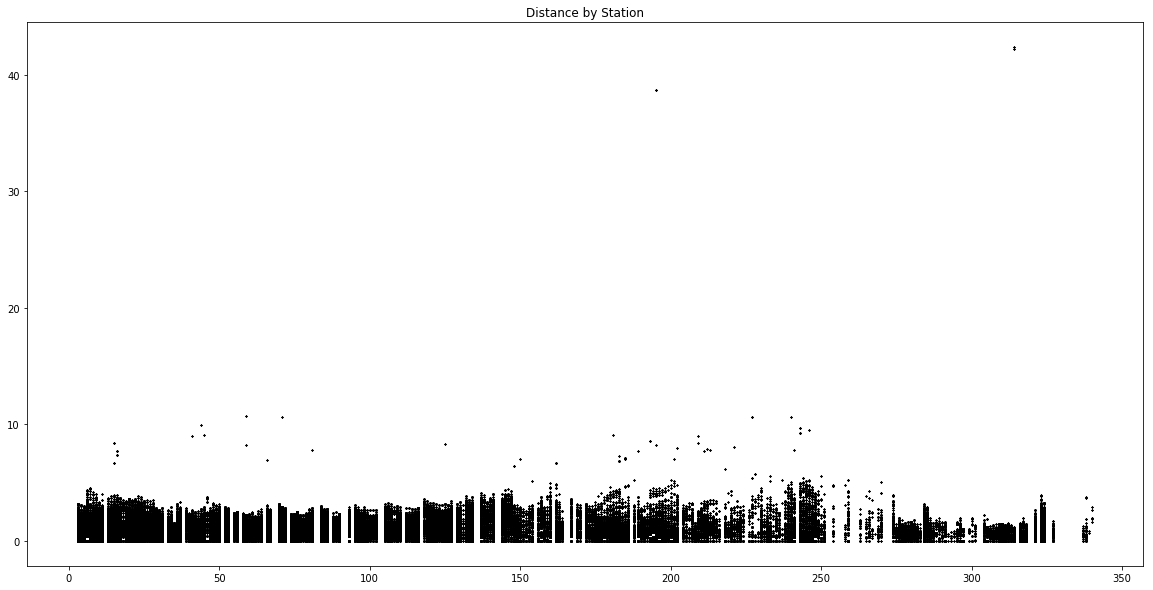

0.9862250151548739


In [8]:
plt.figure(figsize=(20, 10))

plt.scatter(x=df['start_station_id'],
            y=df['distance'],
           marker= 'x', s=2, color= 'black'
)
plt.title('Distance by Station')

plt.show()

print(np.mean(df["distance"]))

We averaged the distance from each station to find out what stations may be too spread out from others.
-  340 -Harmon St at Adeline St (Berkeley)
-  146 -30th St at San Jose Ave (San Francisco)
-  52 -McAllister St at Baker St (San Francisco)
- 118 -Eureka Valley Recreation Center (San Francisco)
- 137 -Jersey St at Castro St (San Francisco)

The stations listed above in San Francisco are on the border of where all the stations are located. 30th St. at San Jose Ave. is the Southernmost station. The other 3 are on the Eastern most of the FordGo bike border. These stations may be too far away from the others and users who live or work adjacent to those stations have to travel further distances to get to where they need to go.

The station in Berkeley is an anomly as it is located right in the center of Berkley and is even situation a few blocks away from a BART station. A bit of investigation was needed to see why this was so.

Using: df['start_station_id'].value_counts()

I found that station ID 340 in Berkeley only had 6 samples of data and those 6 samples of data were of abnormally long trips.

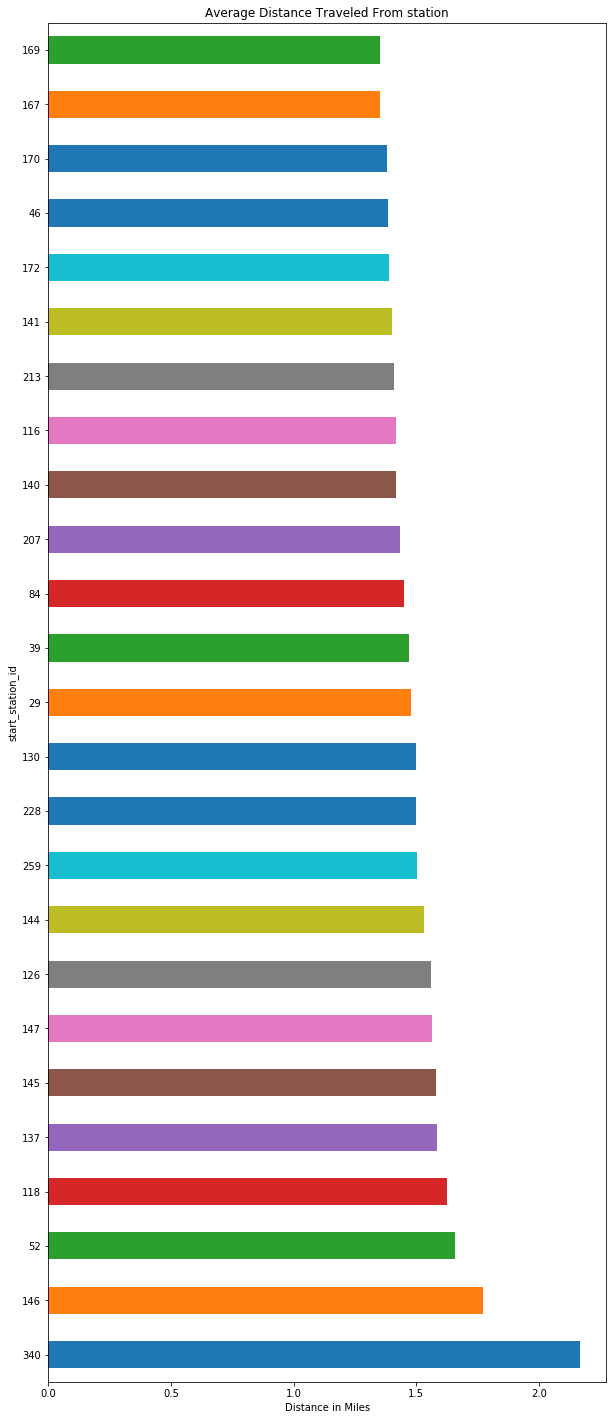

In [9]:

plt.figure(figsize=(10, 25))

distance_from_origin=df.groupby('start_station_id')['distance'].mean().nlargest(25)
 #.head(50).sort_values()
plt.xlabel('Distance in Miles')
plt.ylabel('Station ID Number')
plt.title('Average Distance Traveled From station')
distance_from_origin.plot.barh()




### When are FordGo Bikes Used?
#### What Time of Day are Bikes More Popular?
The most frequent hour of the day that bikes are rented are at:
-  5pm
-  8am
- 6pm
- 9am
- 4pm

These numbers are expected as the majority of users are commuting to or from work at this time. The graph shows a significant drop in users between 10 pm and 5 am. Those are good hours to perform maintainence on the bikes. 

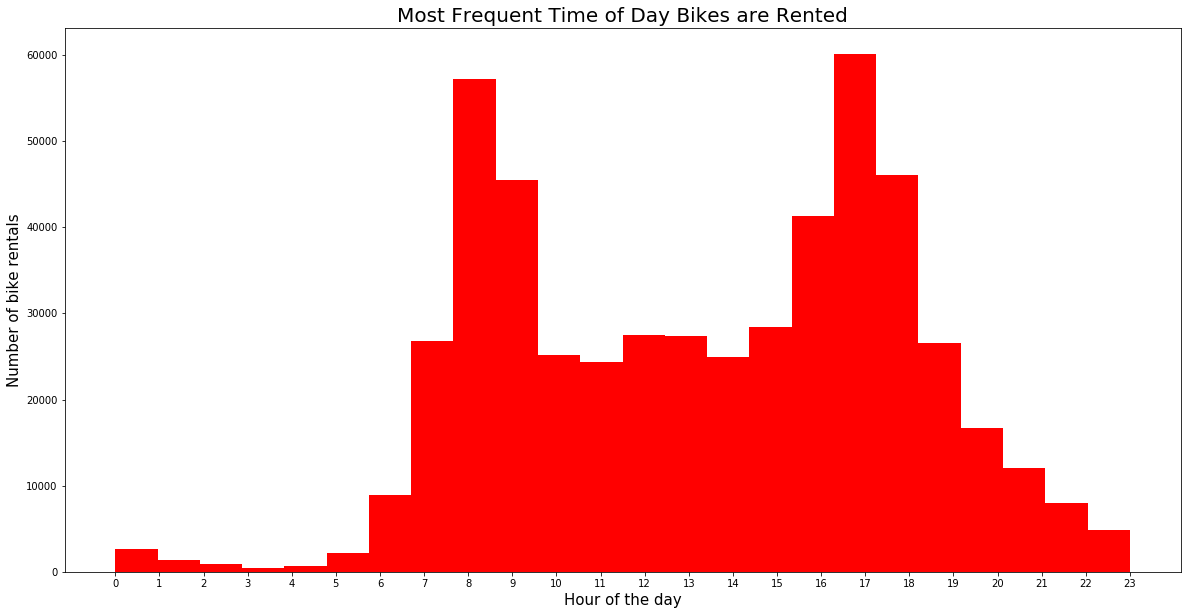

17    60103
8     57229
18    46099
9     45460
16    41335
15    28451
12    27445
13    27373
7     26794
19    26597
10    25218
14    24901
11    24304
20    16644
21    11994
6      8893
22     7966
23     4868
0      2606
5      2145
1      1376
2       861
4       640
3       398
Name: time_of_day, dtype: int64

In [10]:
plt.figure(figsize=(20, 10))

df['time_of_day'] = pd.DatetimeIndex(df['start_time']).hour
df['time_of_day']

plt.hist(df['time_of_day'], bins=24, color='red')


plt.ylabel('Number of bike rentals', fontsize=15)
plt.xlabel('Hour of the day', fontsize=15)
plt.title('Most Frequent Time of Day Bikes are Rented', fontsize=20)
plt.xticks(range(0, 24))
plt.show()

df.time_of_day.value_counts()

#### What are the Busy months for FordGo Bikes?
October seemed to be the busiest month with almost 10,000 more rides than the second month, September. The summer months may have been too hot for users to ride and as fall came around users returned to the bikes as the weather cooled. Ridership seems to have dropped in November and december which might signify that it became too cold to ride the bikes.

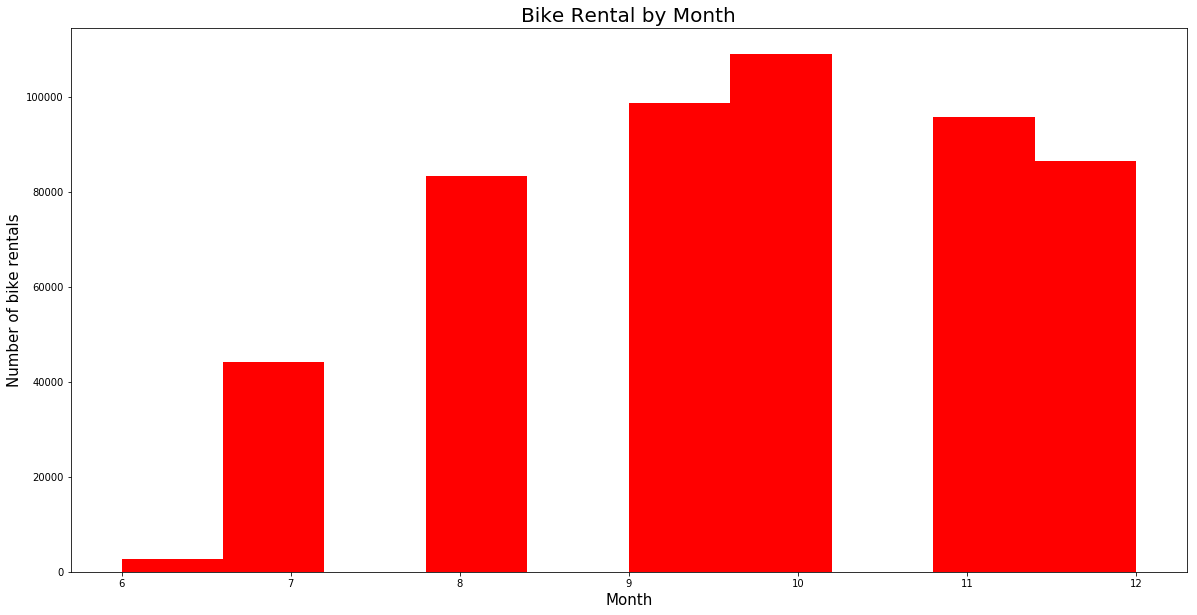

10    108937
9      98558
11     95612
12     86539
8      83292
7      44073
6       2689
Name: month, dtype: int64

In [11]:
plt.figure(figsize=(20, 10))

df_day_data['month'] = pd.DatetimeIndex(df_day_data['start_time']).month
df_day_data['month']

plt.ylabel('Number of bike rentals', fontsize=15)
plt.xlabel('Month', fontsize=15)
plt.title('Bike Rental by Month', fontsize=20)


#plt.plot(df_day_data['month'], color='red')
plt.hist(df_day_data['month'], color='red')
plt.show()
df_day_data.month.value_counts()

#### What Day of the Week is Most Popular?
With 0 equaling Monday and 6 equaling Sunday we examined what days of the week were users the most active. Users were most active on Tuesday and Wednesday and least active during the weekend. This again suggests that users were most active during there commutes to or from work.

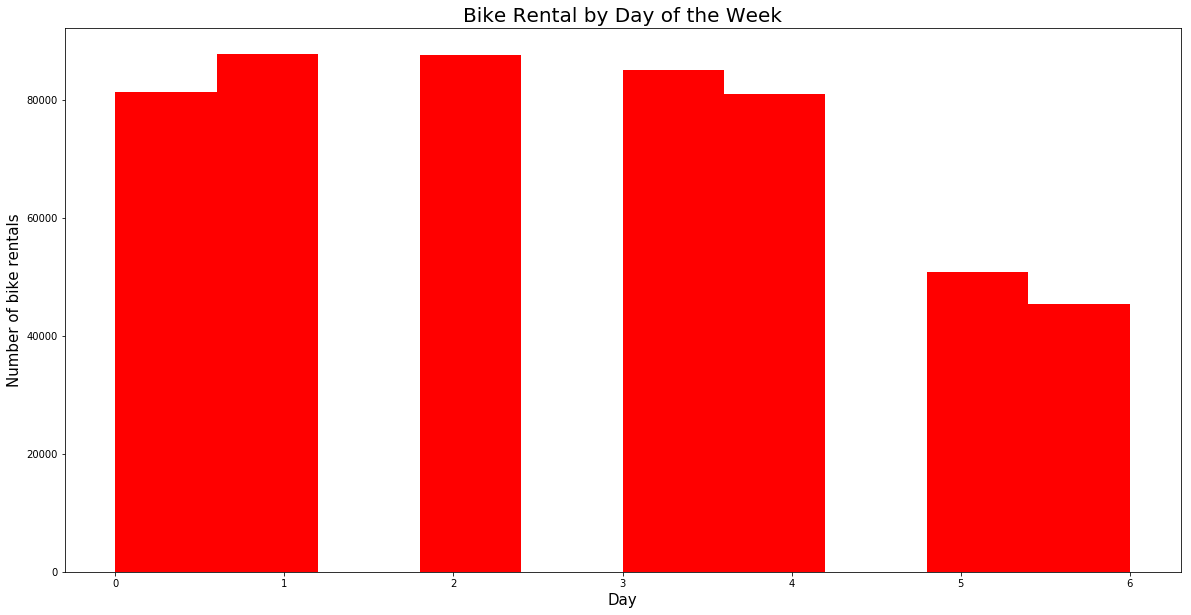

1    87865
2    87752
3    85243
0    81410
4    81165
5    50874
6    45391
Name: day, dtype: int64

In [12]:
plt.figure(figsize=(20, 10))

df_day_data['day'] = pd.DatetimeIndex(df_day_data['start_time']).dayofweek
df_day_data['day']

#df_day_data['day'].plot.bar()
plt.ylabel('Number of bike rentals', fontsize=15)
plt.xlabel('Day', fontsize=15)
plt.title('Bike Rental by Day of the Week', fontsize=20)

plt.hist(df_day_data['day'], color='red')
plt.show()
df_day_data.day.value_counts()

## Further Research
The data is lacking a deeper dive into the demographics of a user. It is limited in including only the gender and birth year. Similarly is the problem with the gender disparity. I am hard pressed to believe that only 23.5% of the users are female. As mentioned above, perhaps the sign up process makes it difficult to collect the best data The dataset only includes the final 6 months of 2017 and having data from the first 6 months would have made this data more complete. 

A better representation of the distance traveled data could be done by using visualizations that included maps. The dataset includes the longitude and latitude of each station and includes how long each trip occurs in seconds. A skilled data scientist may be able to predict the precise route of a rider using this data at hand.  